# UVOD

Kot testne podatke bomo vzeli $n$ podatkov za različne. porazdelitve. Nato bomo vzeli 4 funkcije:
- pdf narejen z gaussian_kde glede na podatke,
- histogram z 10 stolpci,
- histogram s 15 stolpci,
- histogram z 20 stolpci,
- histogram z 10 "equiquantal" stolpci, 

in točno pozrazdelitev. Pri porazdleitvah na zaprtih intervalih in na $[0,\infty)$ bomo omejili in normirali gaussian_kde s funkcijo pdf_na_int.

Nato bomo računali renyi divergenco med točno in eno izmed štirih za različne rede $\alpha$. Začnimo z normalno porazdelitvijo.

In [2]:
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
from renyi import JRD_pdfs
from equiquantal_bins import eqBins
from kernel_estimators import adapt_kde

n = 10000

def hist_to_fun(histogram):
    # histogram: nabor oblike (heights, edges) - stolpci in meje stolpcev histograma
    # RETURN: funkcija, ki ustreza argumentu histogram

    def nested(x, hist):
        [heights, edges] = hist
        # kjer ima histogram vrednost 0, mu bomo zaradi racunanja v nadaljevanju priredili vrednost eps
        h_val = np.finfo(float).eps
        for i in range(len(edges)-1):
            if (edges[i] <= x <= edges[i+1]):
                if heights[i] != 0:
                    h_val = heights[i]
                break
        return h_val
    fun = lambda x: nested(x, histogram)
    return fun
        
def pdf_na_int(pdf,a,b):
    # ploscina za normalizacijo
    area_on_int = integrate.quad(pdf,a,b)[0]

    def pdf_x(x):
        # omejitev obmocja in normalizacija
        return np.where(np.logical_or(np.less(x,a),np.greater(x,b)), 0, pdf(x)/area_on_int)
    
    return pdf_x

# NORMALNA PORAZDELITEV

Normalna porazdelitev, mu=0, sigma=1.

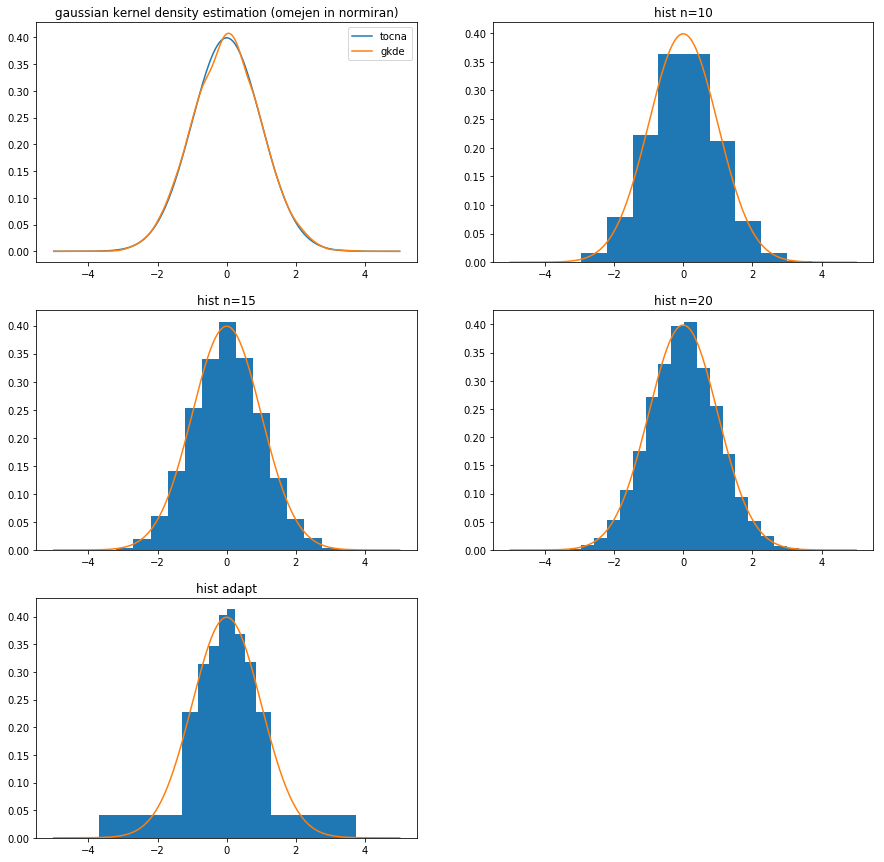

In [9]:
from renyi import renyi_divergence_cont as RD

tocna = lambda x: stats.norm.pdf(x,0,1)

gauss = np.random.normal(0,1,n)

gkde = stats.gaussian_kde(gauss)
hist1 = hist_to_fun(np.histogram(gauss,bins=10,density=1))
hist2 = hist_to_fun(np.histogram(gauss,bins=15,density=1))
hist3 = hist_to_fun(np.histogram(gauss,bins=20,density=1))
hist_adapt = hist_to_fun(np.histogram(gauss,bins=eqBins(gauss,10),density=1))

## TEST, CE JE VSE OK
x = np.linspace(-5,5,1000)
plt.figure(figsize=(15,15))

data = gauss

plt.subplot(3,2,1)
plt.title("gaussian kernel density estimation (omejen in normiran)")
plt.plot(x,tocna(x),label="tocna")
plt.plot(x,gkde(x),label="gkde")
plt.legend()

plt.subplot(3,2,2)
plt.title("hist n=10")
plt.hist(data,bins=10,density=1)
plt.plot(x,tocna(x),label="tocna")

plt.subplot(3,2,3)
plt.title("hist n=15")
plt.hist(data,bins=15,density=1)
plt.plot(x,tocna(x),label="tocna")

plt.subplot(3,2,4)
plt.title("hist n=20")
plt.hist(data,bins=20,density=1)
plt.plot(x,tocna(x),label="tocna")

plt.subplot(3,2,5)
plt.title("hist adapt")
plt.hist(data,bins=eqBins(data,10),density=1)
plt.plot(x,tocna(x),label="tocna")

plt.show()

gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan


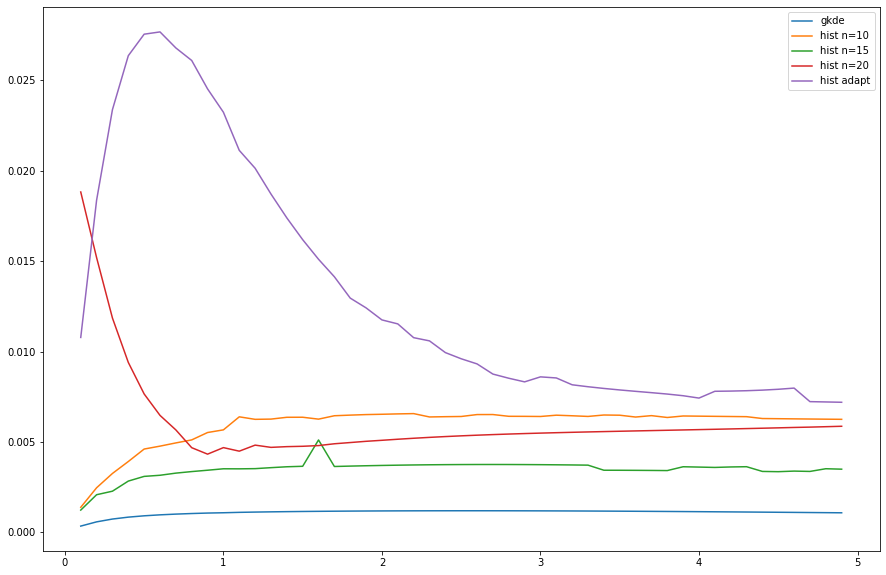

In [3]:
rang_alpha = np.arange(0.1,5,0.1)

gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(gauss),maximum=max(gauss)) for i in rang_alpha]
print("gkde_renyi - koncan")
hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(gauss),maximum=max(gauss)) for i in rang_alpha]
print("hist1_renyi - koncan")
hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(gauss),maximum=max(gauss)) for i in rang_alpha]
print("hist2_renyi - koncan")
hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(gauss),maximum=max(gauss)) for i in rang_alpha]
print("hist3_renyi - koncan")
hist_adapt_renyi = [JRD_pdfs([tocna,hist_adapt],i,minimum=min(gauss),maximum=max(gauss)) for i in rang_alpha]
print("hist_adapt_renyi - koncan")

plt.figure(figsize=(15,10))

plt.plot(rang_alpha, gkde_renyi, label="gkde")
plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
plt.plot(rang_alpha, hist_adapt_renyi, label="hist adapt")

plt.legend()

plt.show()

<font size=4>**SKLEP**: za normalno poradelitev je najboljša gkde estimacija.

# WEIBULL PORAZDELITEV

Weibull porazdelitev, c=2.

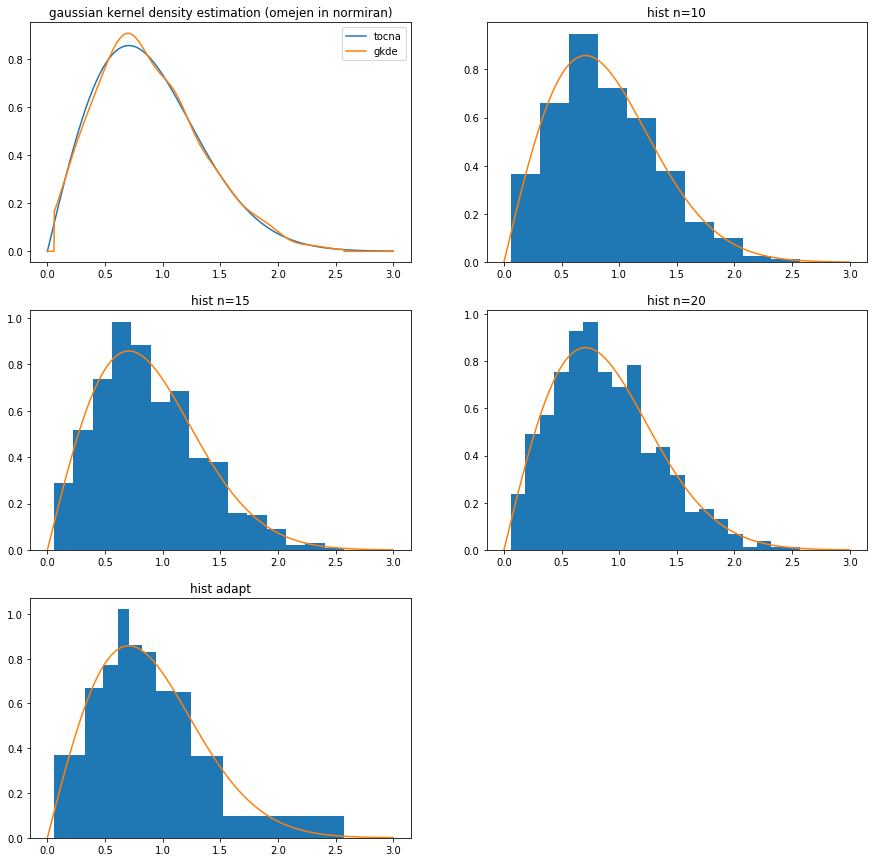

In [104]:
tocna = lambda x: stats.weibull_min.pdf(x,2)

wei = np.random.weibull(2,n)

gkde = pdf_na_int(stats.gaussian_kde(wei),min(wei),max(wei))
hist1 = hist_to_fun(np.histogram(wei,bins=10,density=1))
hist2 = hist_to_fun(np.histogram(wei,bins=15,density=1))
hist3 = hist_to_fun(np.histogram(wei,bins=20,density=1))
hist_adapt = hist_to_fun(np.histogram(wei,bins=eqBins(wei,10),density=1))


## TEST, CE JE VSE OK
x = np.linspace(0,3,1000)
plt.figure(figsize=(15,15))

data = wei

plt.subplot(3,2,1)
plt.title("gaussian kernel density estimation (omejen in normiran)")
plt.plot(x,tocna(x),label="tocna")
plt.plot(x,gkde(x),label="gkde")
plt.legend()

plt.subplot(3,2,2)
plt.title("hist n=10")
plt.hist(data,bins=10,density=1)
plt.plot(x,tocna(x),label="tocna")

plt.subplot(3,2,3)
plt.title("hist n=15")
plt.hist(data,bins=15,density=1)
plt.plot(x,tocna(x),label="tocna")

plt.subplot(3,2,4)
plt.title("hist n=20")
plt.hist(data,bins=20,density=1)
plt.plot(x,tocna(x),label="tocna")

plt.subplot(3,2,5)
plt.title("hist adapt")
plt.hist(data,bins=eqBins(data,10),density=1)
plt.plot(x,tocna(x),label="tocna")

plt.show()

gkde_renyi - koncan
hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan


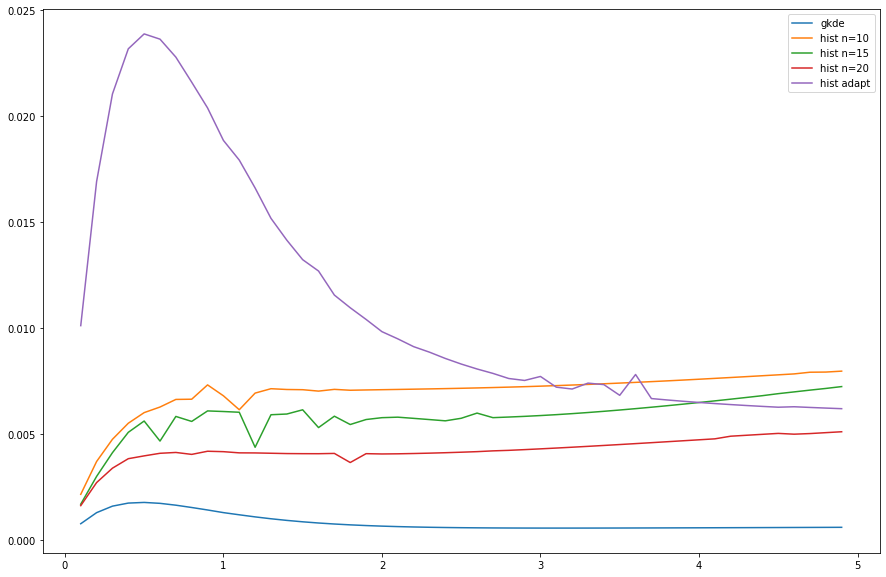

In [10]:
rang_alpha = np.arange(0.1,5,0.1)

gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(wei),maximum=max(wei)) for i in rang_alpha]
print("gkde_renyi - koncan")
hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(wei),maximum=max(wei)) for i in rang_alpha]
print("hist1_renyi - koncan")
hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(wei),maximum=max(wei)) for i in rang_alpha]
print("hist2_renyi - koncan")
hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(wei),maximum=max(wei)) for i in rang_alpha]
print("hist3_renyi - koncan")
hist_adapt_renyi = [JRD_pdfs([tocna,hist_adapt],i,minimum=min(wei),maximum=max(wei)) for i in rang_alpha]
print("hist_adapt_renyi - koncan")

plt.figure(figsize=(15,10))

plt.plot(rang_alpha, gkde_renyi, label="gkde")
plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
plt.plot(rang_alpha, hist_adapt_renyi, label="hist adapt")

plt.legend()

plt.show()

<font size=4>**SKLEP**: za Weibull poradelitev je najboljša gkde estimacija.

# PARETO PORAZDELITEV

Pareto porazdelitev, $\alpha$=2

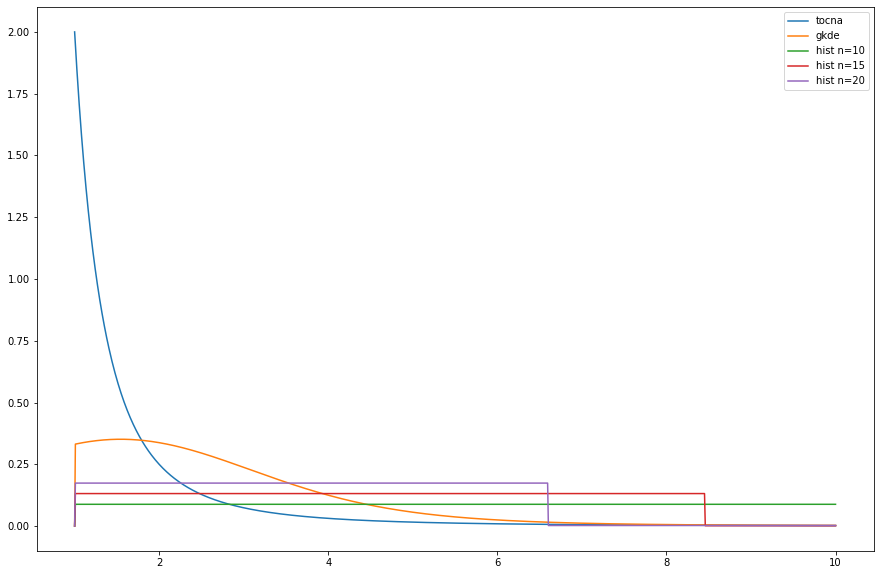

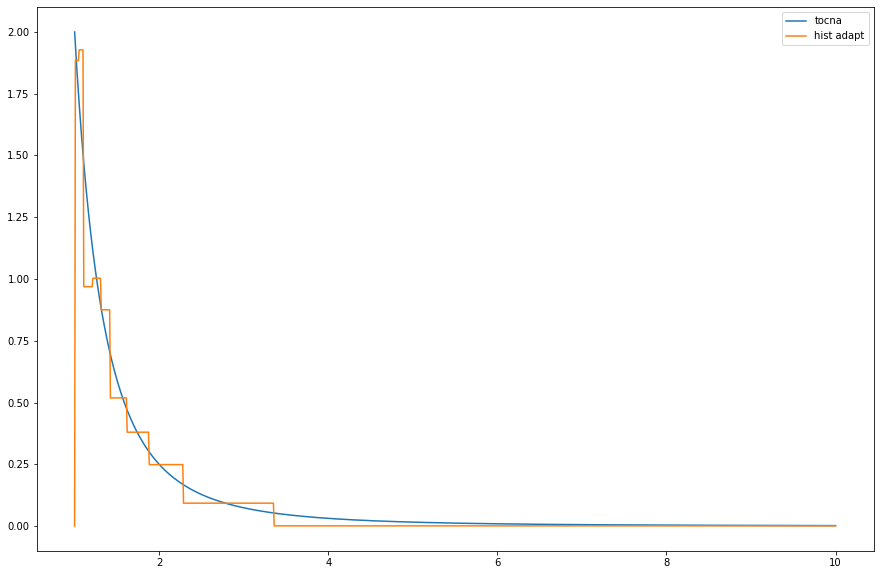

In [23]:
tocna = lambda x: stats.pareto.pdf(x,2)

par = np.random.pareto(2,n)+1
## omejimo območje, da ne dobimo ogromnih repov - drugače je nemogoče s histogrami
# par = par[par < 10]

gkde = pdf_na_int(stats.gaussian_kde(par),min(par),max(par))
hist1 = hist_to_fun(np.histogram(par,bins=10,density=1))
hist2 = hist_to_fun(np.histogram(par,bins=15,density=1))
hist3 = hist_to_fun(np.histogram(par,bins=20,density=1))
hist_adapt = hist_to_fun(np.histogram(par,bins=eqBins(par,10),density=1))

## TEST, CE JE VSE OK
x = np.linspace(1,10,1000)
plt.figure(figsize=(15,10))
plt.plot(x,tocna(x),label="tocna")
plt.plot(x,gkde(x),label="gkde")
plt.plot(x,[hist1(xi) for xi in x],label="hist n=10")
plt.plot(x,[hist2(xi) for xi in x],label="hist n=15")
plt.plot(x,[hist3(xi) for xi in x],label="hist n=20")
plt.legend()

plt.figure(figsize=(15,10))
plt.plot(x,tocna(x),label="tocna")
plt.plot(x,[hist_adapt(xi) for xi in x],label="hist adapt")
plt.legend()

plt.show()

Vidimo, da so histogrami pareto porazdelitve zelo čudni, prav tako gaussian_kde. To je posledica tega, da so repi veliki. Poglejmo si, kakšni so meje stolpcev za n=10 in kakšnih je maksimalnih 5 podatkov. Nato vseeno izrišimo renyi divergence.

In [24]:
y,x=np.histogram(par,bins=10,density=1)
print(x)
print(sorted(par)[-5:])

[  1.00053746  12.18869681  23.37685616  34.56501551  45.75317486
  56.94133421  68.12949356  79.31765291  90.50581227 101.69397162
 112.88213097]
[15.667593485868894, 16.501046505490056, 34.67935247197933, 42.56891141483707, 112.8821309689686]


gkde_renyi - koncan
hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan


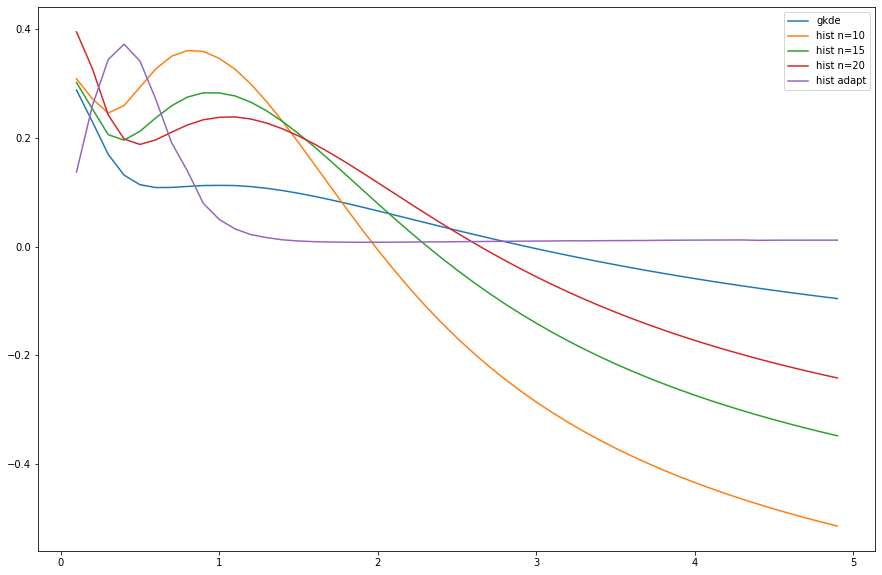

In [25]:
rang_alpha = np.arange(0.1,5,0.1)

gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(par),maximum=max(par)) for i in rang_alpha]
print("gkde_renyi - koncan")
hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(par),maximum=max(par)) for i in rang_alpha]
print("hist1_renyi - koncan")
hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(par),maximum=max(par)) for i in rang_alpha]
print("hist2_renyi - koncan")
hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(par),maximum=max(par)) for i in rang_alpha]
print("hist3_renyi - koncan")
hist_adapt_renyi = [JRD_pdfs([tocna,hist_adapt],i,minimum=min(par),maximum=max(par)) for i in rang_alpha]
print("hist_adapt_renyi - koncan")

plt.figure(figsize=(15,10))

plt.plot(rang_alpha, gkde_renyi, label="gkde")
plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
plt.plot(rang_alpha, hist_adapt_renyi, label="hist adapt")

plt.grid
plt.legend()

plt.show()

**SKLEP**:
- pri pareto porazdelitvi ne moremo uporabiti ekvidistančnih binov! (zaradi višine repa)
- gkde se obnaša bolje, kot histogram, vendar še kar ne najbolje.
- za pareto porazdelitev bi bilo potrebno nujno uporabiti histograme z adptivnimi širinami stolpcev ALI drug kernel!

# BETA PORAZDELITEV
Testirajmo še različne beta porazdelitve. BŠS lahko delamo za $\alpha\leq\beta$, ker je beta porazdelitev simetrična okoli x=0.5 (t.j. če zamenjamo $\alpha$ in $\beta$ dobimo zrcaljeno porazdelitev).

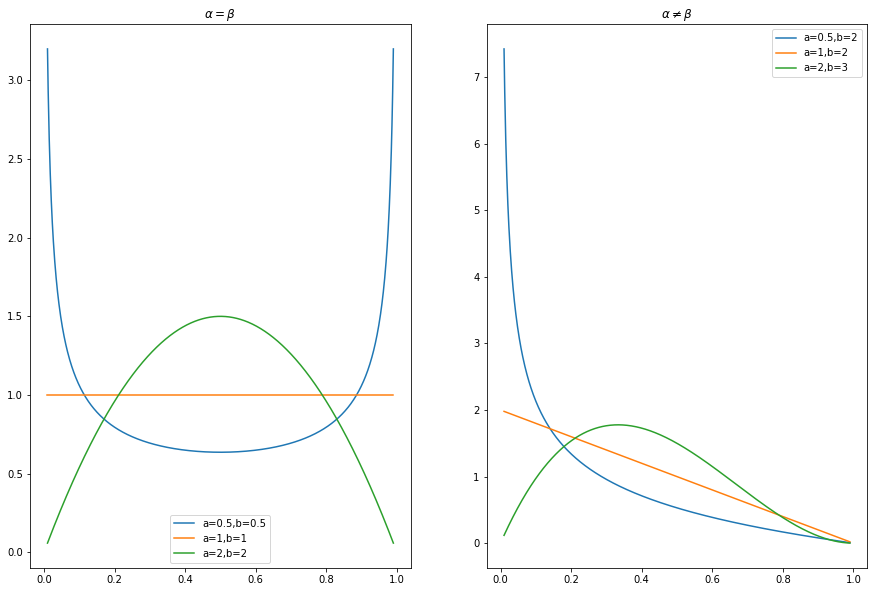

In [92]:
tocna1 = lambda x: stats.beta.pdf(x,0.5,0.5)
tocna2 = lambda x: stats.beta.pdf(x,1,1)
tocna3 = lambda x: stats.beta.pdf(x,2,2)
tocna4 = lambda x: stats.beta.pdf(x,0.5,2)
tocna5 = lambda x: stats.beta.pdf(x,1,2)
tocna6 = lambda x: stats.beta.pdf(x,2,3)

x = np.linspace(0.01,0.99,1000)

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title(r"$\alpha = \beta$")
plt.plot(x,tocna1(x),label="a=0.5,b=0.5")
plt.plot(x,tocna2(x),label="a=1,b=1")
plt.plot(x,tocna3(x),label="a=2,b=2")
plt.legend()

plt.subplot(1,2,2)
plt.title(r"$\alpha \neq \beta$")
plt.plot(x,tocna4(x),label="a=0.5,b=2")
plt.plot(x,tocna5(x),label="a=1,b=2")
plt.plot(x,tocna6(x),label="a=2,b=3")
plt.legend()

plt.show()

Za preglednost sestavimo funkcijo, kamor bomo vstavljali različne parametre.

In [86]:
def JRD_beta_prikaz(alpha,beta, n=600):
    print("BETA: a={}, b={}\n\n".format(str(alpha),str(beta)))
    
    tocna = lambda x: stats.beta.pdf(x,alpha,beta)

    data = np.random.beta(alpha,beta,n)
    ## omejimo območje, da ne dobimo ogromnih repov - drugače je nemogoče s histogrami
    # par = par[par < 10]

    gkde = pdf_na_int(stats.gaussian_kde(data),min(data),max(data))
    hist1 = hist_to_fun(np.histogram(data,bins=10,density=1))
    hist2 = hist_to_fun(np.histogram(data,bins=15,density=1))
    hist3 = hist_to_fun(np.histogram(data,bins=20,density=1))
    hist_adapt = hist_to_fun(np.histogram(data,bins=eqBins(data,10),density=1))
    
    ## TEST, CE JE VSE OK
    x = np.linspace(0,1,1000)
    plt.figure(figsize=(15,15))
    
    plt.subplot(3,2,1)
    plt.title("gaussian kernel density estimation (omejen in normiran)")
    plt.plot(x,tocna(x),label="tocna")
    plt.plot(x,gkde(x),label="gkde")
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.title("hist n=10")
    plt.hist(data,bins=10,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,3)
    plt.title("hist n=15")
    plt.hist(data,bins=15,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,4)
    plt.title("hist n=20")
    plt.hist(data,bins=20,density=1)
    plt.plot(x,tocna(x),label="tocna")

    plt.subplot(3,2,5)
    plt.title("hist adapt")
    plt.hist(data,bins=eqBins(data,10),density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    # izracun JRD
    rang_alpha = np.arange(0.1,5,0.1)

    gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("gkde_renyi - koncan")
    hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist1_renyi - koncan")
    hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist2_renyi - koncan")
    hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist3_renyi - koncan")
    hist_adapt_renyi = [JRD_pdfs([tocna,hist_adapt],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist_adapt_renyi - koncan")

    plt.figure(figsize=(15,10))
    plt.title("JRD med tocno in priblizkom (hist,gkde)")
    plt.plot(rang_alpha, gkde_renyi, label="gkde")
    plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
    plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
    plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
    plt.plot(rang_alpha, hist_adapt_renyi, label="hist adapt")
    plt.legend()
    
    print("\n\n\ntocna, gkde, histogrami")
    
    plt.show()


## BETA: a=1, b=1 - UNIFORMNA PORAZDELITEV

BETA: a=1, b=1


gkde_renyi - koncan
hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


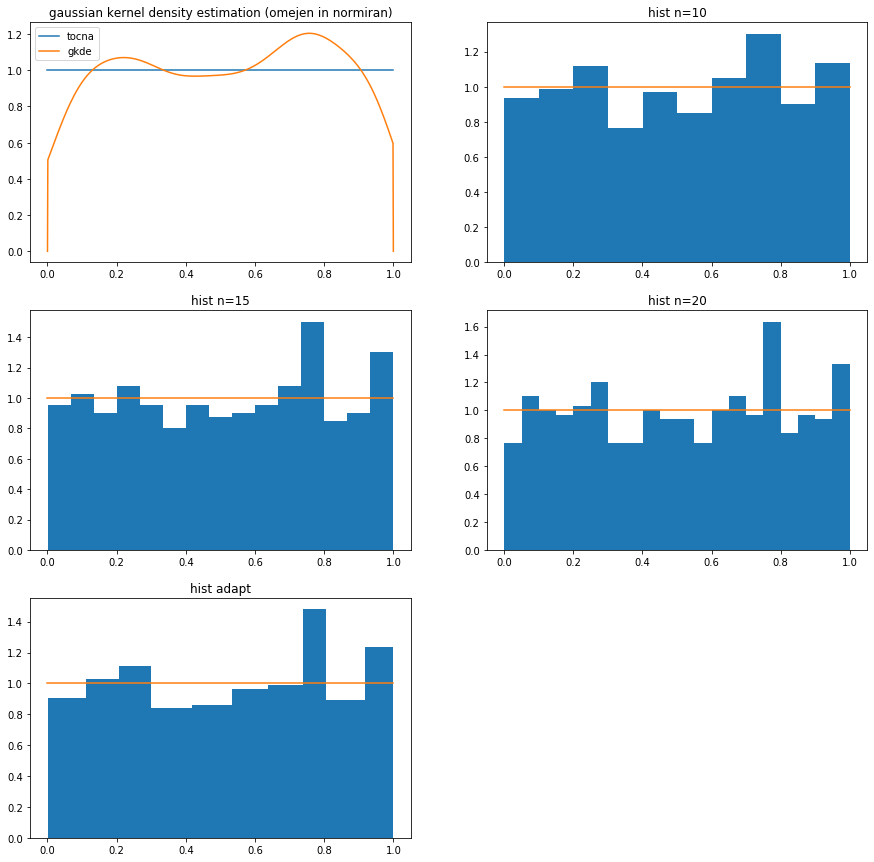

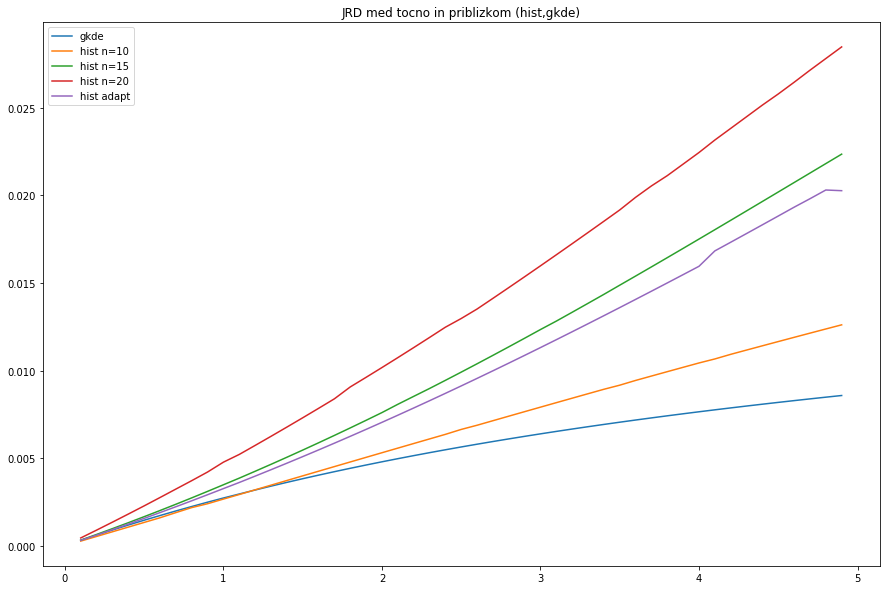

In [87]:
JRD_beta_prikaz(1,1)

## BETA: a=0.5, b=0.5

BETA: a=0.5, b=0.5




/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


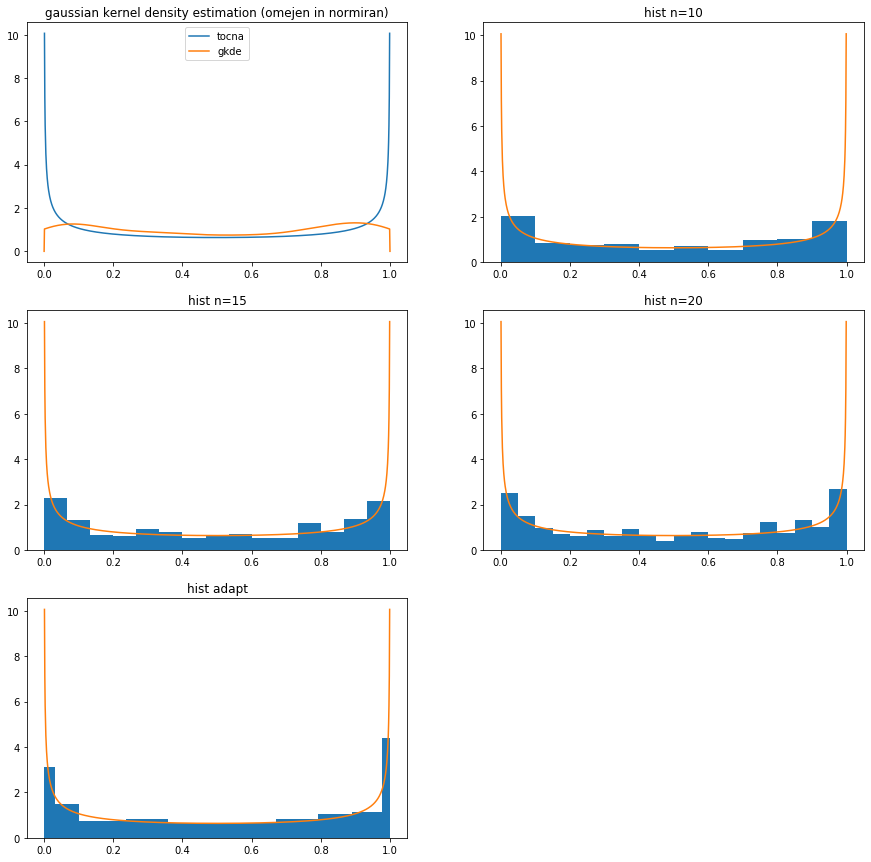

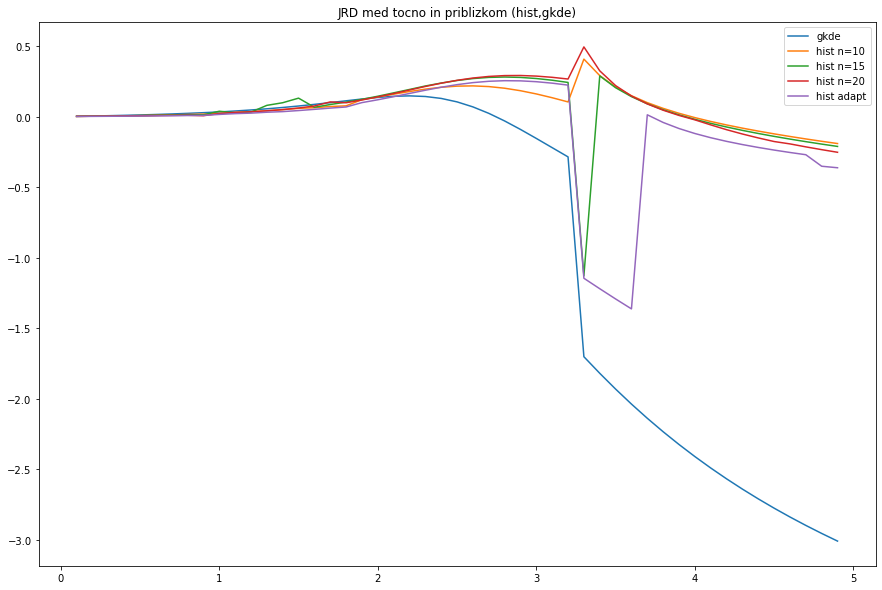

In [88]:
JRD_beta_prikaz(0.5,0.5)

## BETA: a=2, b=2

BETA: a=2, b=2


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


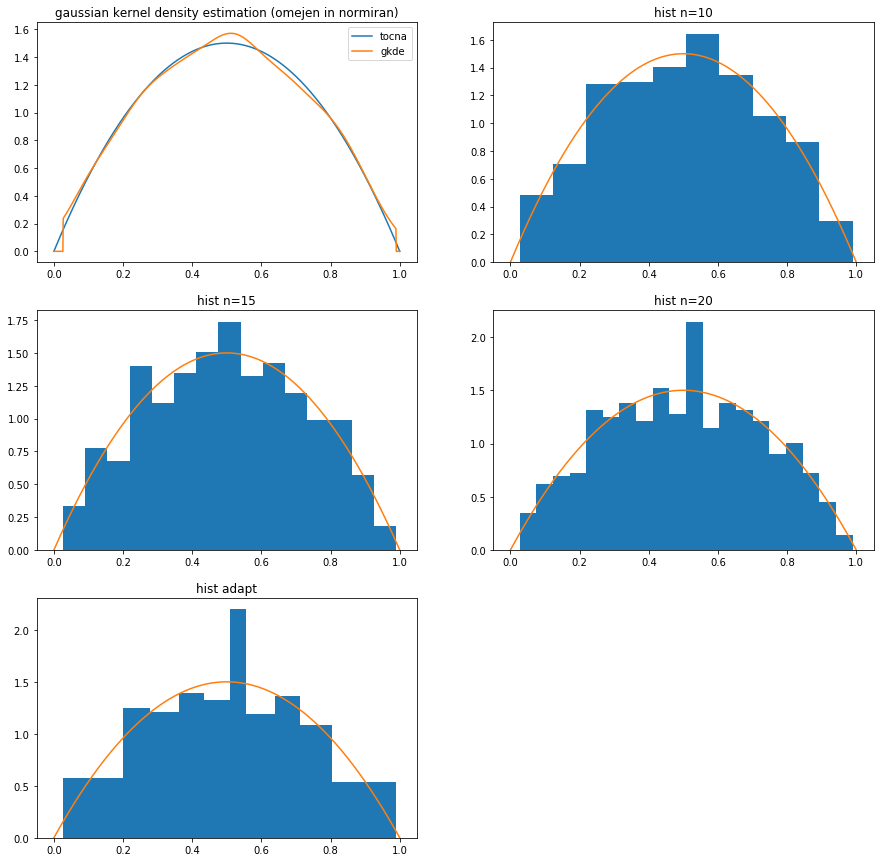

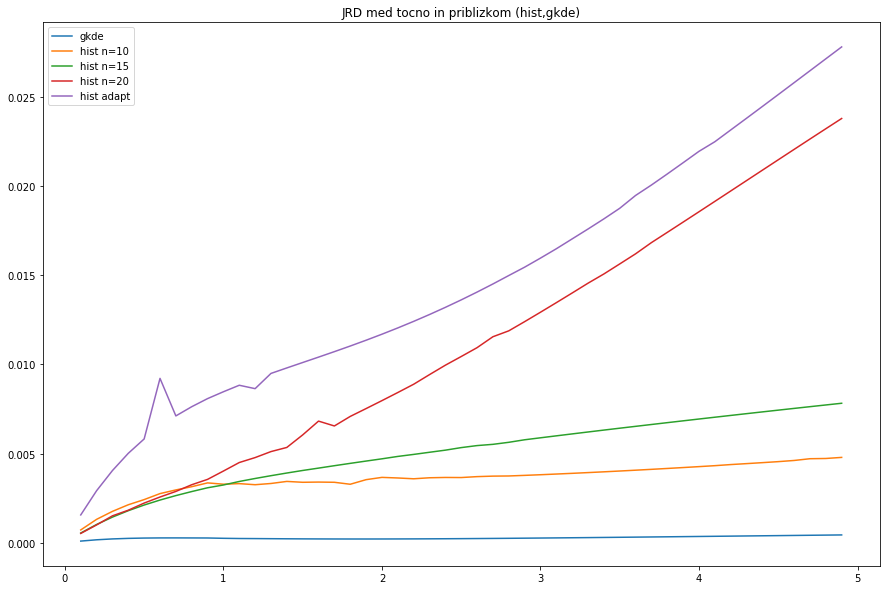

In [89]:
JRD_beta_prikaz(2,2)

## BETA: a=0.5, b=2

BETA: a=0.5, b=2




/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


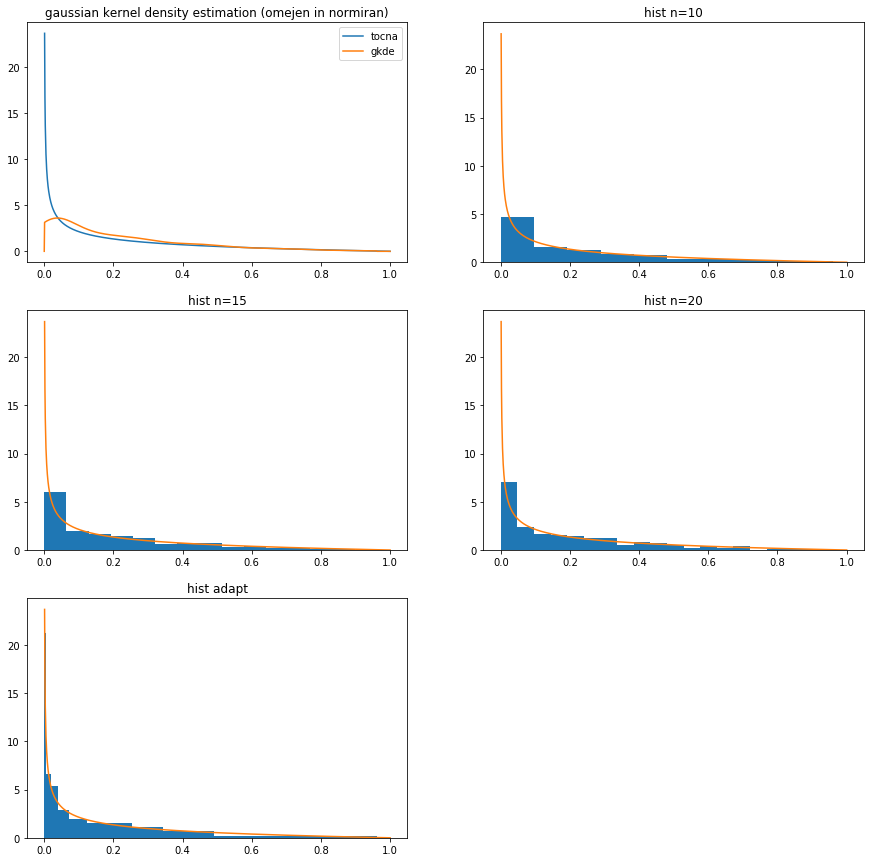

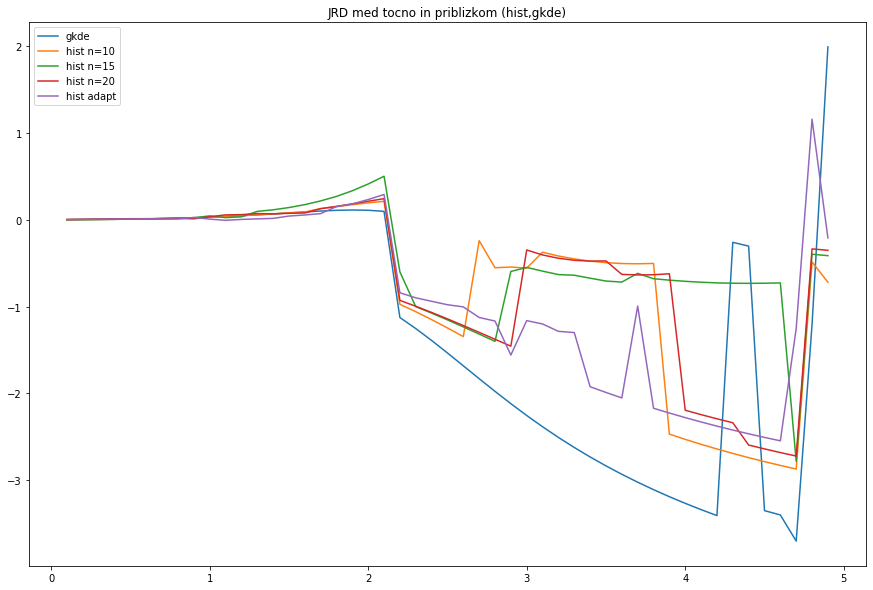

In [93]:
JRD_beta_prikaz(0.5,2)

## BETA: a=1, b=2

BETA: a=1, b=2


gkde_renyi - koncan
hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


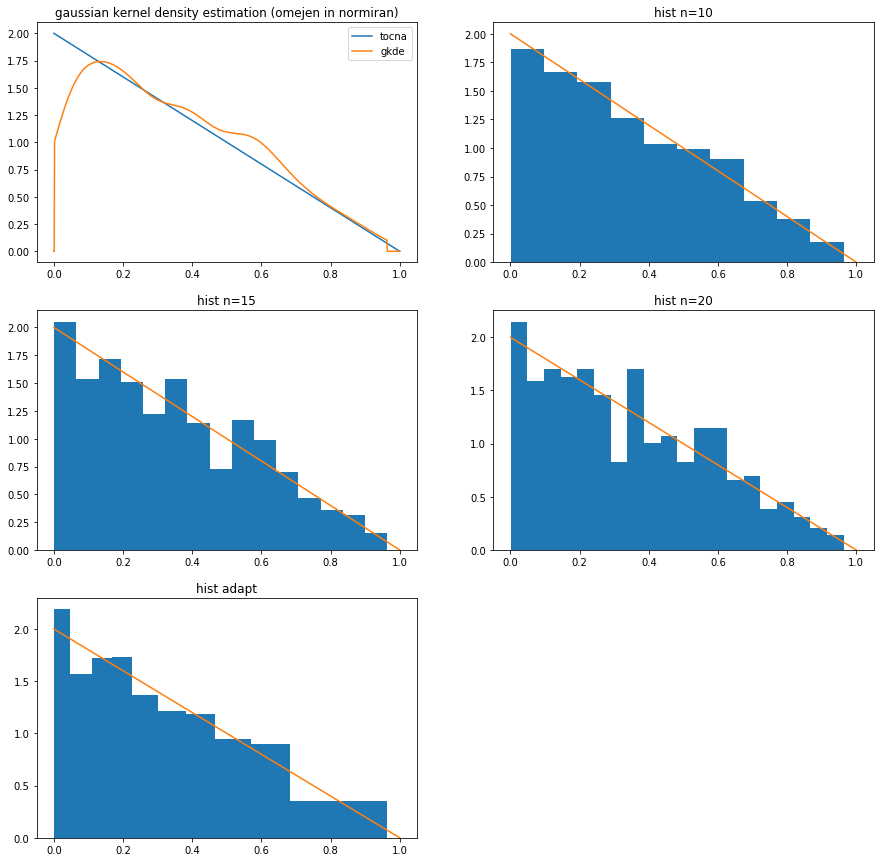

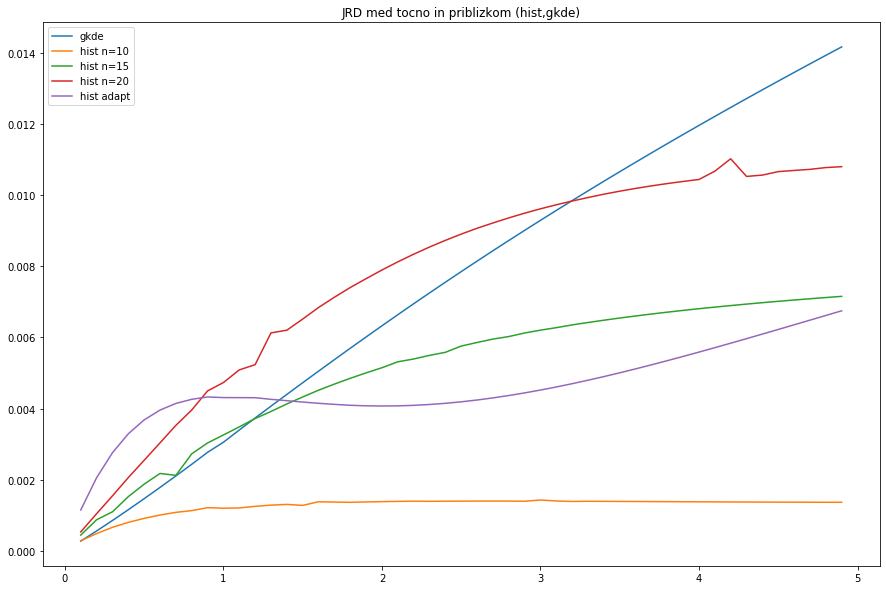

In [94]:
JRD_beta_prikaz(1,2)

## BETA: a=2, b=3

BETA: a=2, b=3


gkde_renyi - koncan
hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


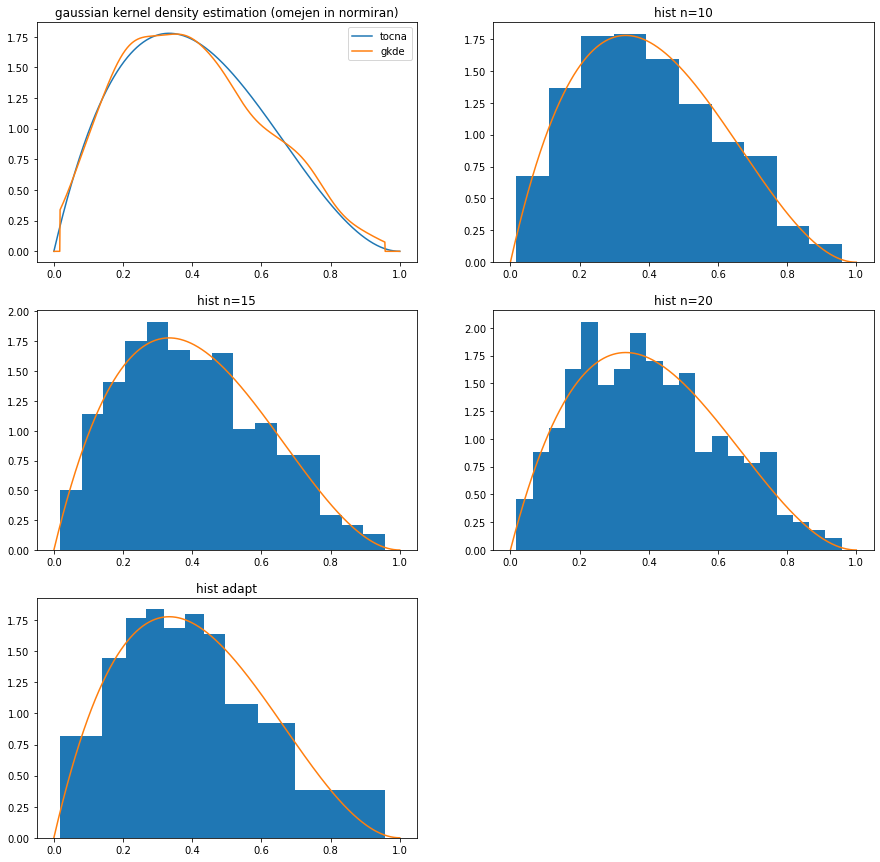

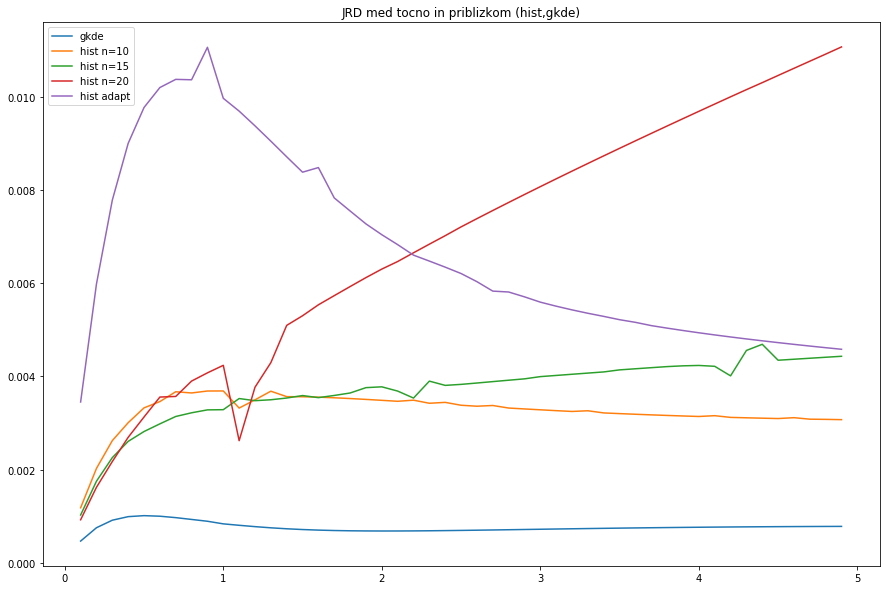

In [95]:
JRD_beta_prikaz(2, 3)

# RAYLEIGH PORAZDELITEV

Poglejmo Rayleigh porazdelitev za parametre 0.5, 1, 2.

In [111]:
def JRD_rayleigh_prikaz(sigma, n=600):
    print("RAYLEIGH: sigma={}\n\n".format(str(sigma)))
    
    tocna = lambda x: stats.rayleigh.pdf(x,scale=sigma)

    data = np.random.rayleigh(sigma,n)
    ## omejimo območje, da ne dobimo ogromnih repov - drugače je nemogoče s histogrami
    # par = par[par < 10]

    gkde = pdf_na_int(stats.gaussian_kde(data),min(data),max(data))
    hist1 = hist_to_fun(np.histogram(data,bins=10,density=1))
    hist2 = hist_to_fun(np.histogram(data,bins=15,density=1))
    hist3 = hist_to_fun(np.histogram(data,bins=20,density=1))
    hist_adapt = hist_to_fun(np.histogram(data,bins=eqBins(data,10),density=1))
    
    ## TEST, CE JE VSE OK
    x = np.linspace(0,5,1000)
    plt.figure(figsize=(15,15))
    
    plt.subplot(3,2,1)
    plt.title("gaussian kernel density estimation (omejen in normiran)")
    plt.plot(x,tocna(x),label="tocna")
    plt.plot(x,gkde(x),label="gkde")
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.title("hist n=10")
    plt.hist(data,bins=10,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,3)
    plt.title("hist n=15")
    plt.hist(data,bins=15,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,4)
    plt.title("hist n=20")
    plt.hist(data,bins=20,density=1)
    plt.plot(x,tocna(x),label="tocna")

    plt.subplot(3,2,5)
    plt.title("hist adapt")
    plt.hist(data,bins=eqBins(data,10),density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    # izracun JRD
    rang_alpha = np.arange(0.1,5,0.1)

    gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("gkde_renyi - koncan")
    hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist1_renyi - koncan")
    hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist2_renyi - koncan")
    hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist3_renyi - koncan")
    hist_adapt_renyi = [JRD_pdfs([tocna,hist_adapt],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist_adapt_renyi - koncan")

    plt.figure(figsize=(15,10))
    plt.title("JRD med tocno in priblizkom (hist,gkde)")
    plt.plot(rang_alpha, gkde_renyi, label="gkde")
    plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
    plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
    plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
    plt.plot(rang_alpha, hist_adapt_renyi, label="hist adapt")
    plt.legend()
    
    print("\n\n\ntocna, gkde, histogrami")
    
    plt.show()

## RAYLEIGH: sigma=0.5

RAYLEIGH: sigma=0.5


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


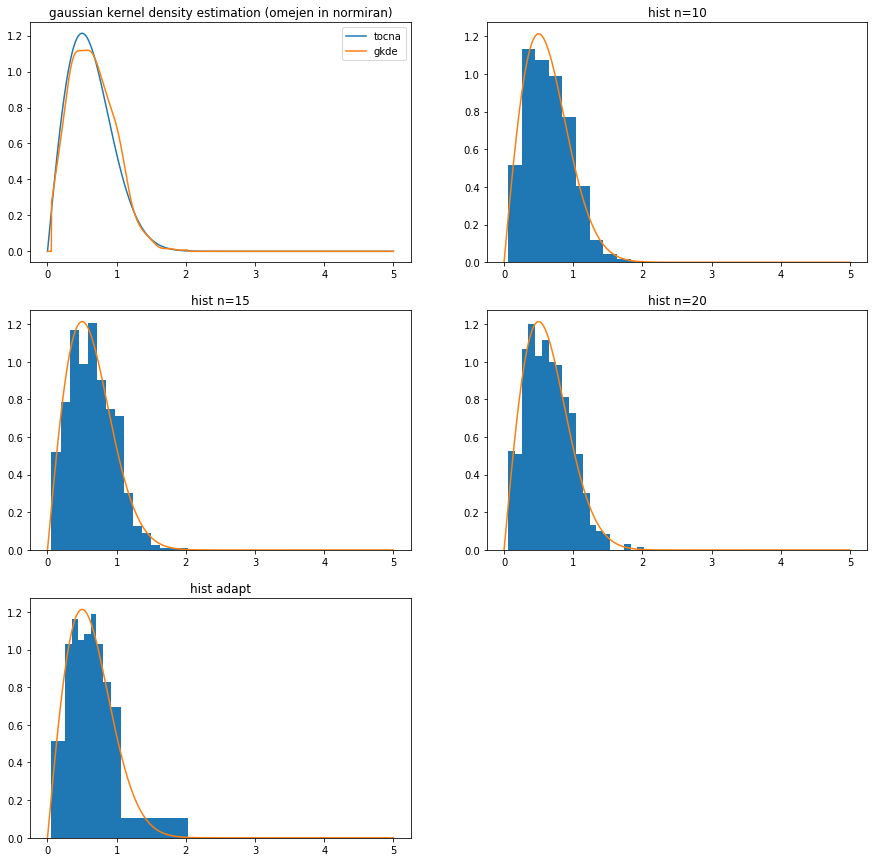

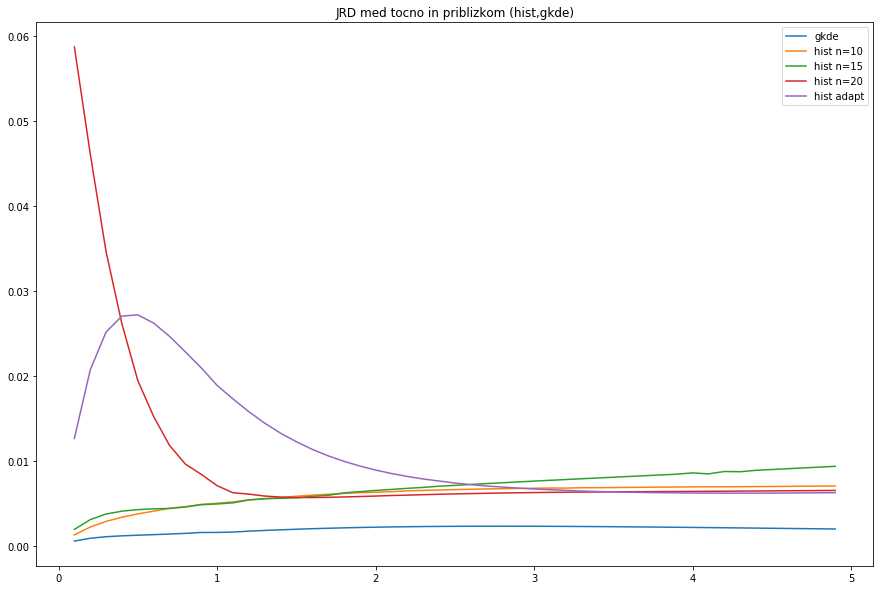

In [112]:
JRD_rayleigh_prikaz(0.5)

## RAYLEIGH: sigma=1

RAYLEIGH: sigma=1


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


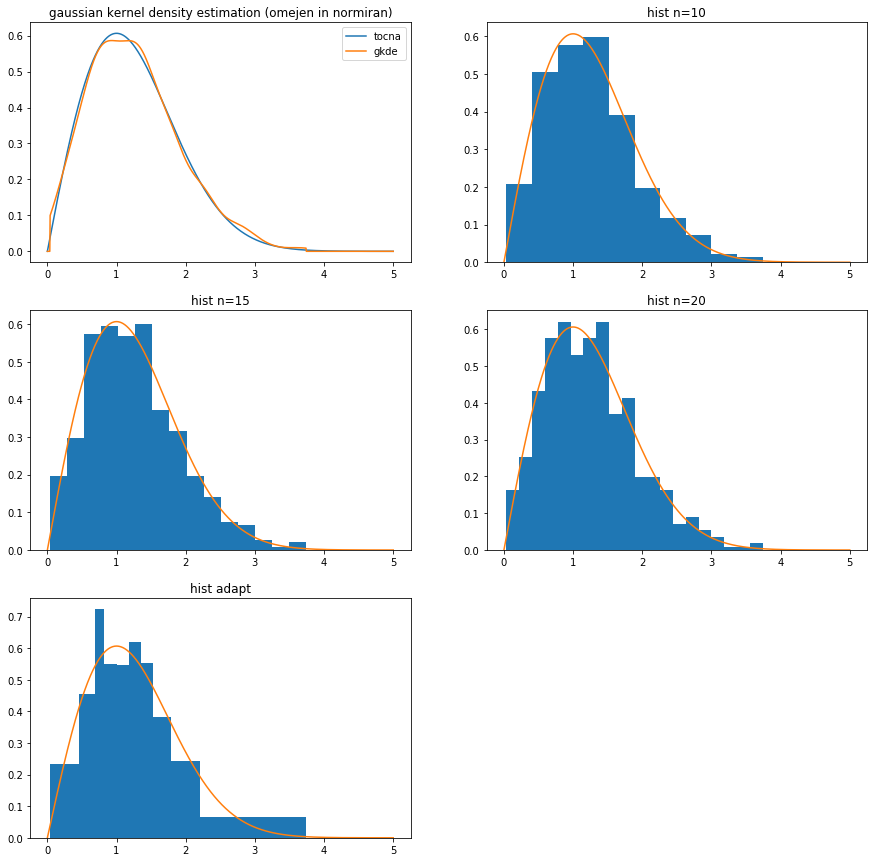

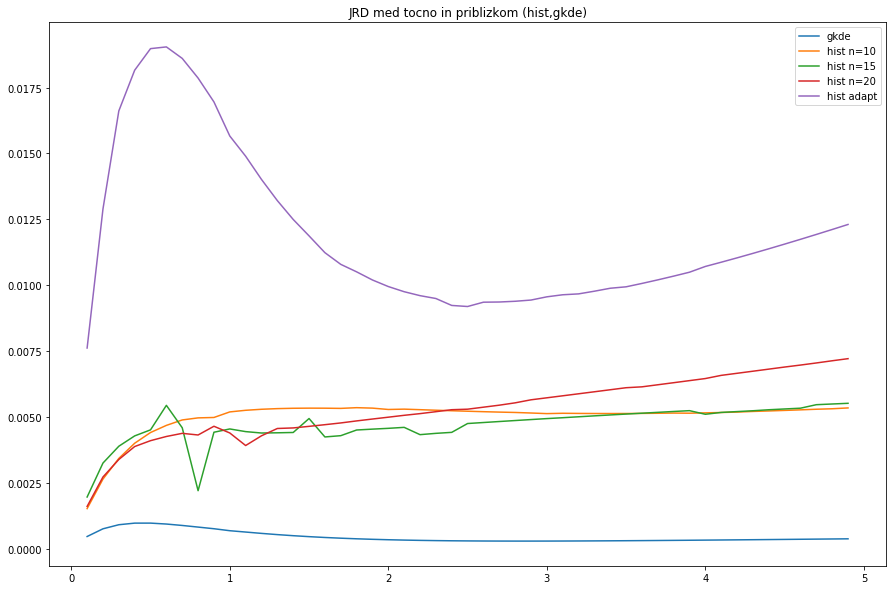

In [113]:
JRD_rayleigh_prikaz(1)

## RAYLEIGH: sigma=2

RAYLEIGH: sigma=2


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


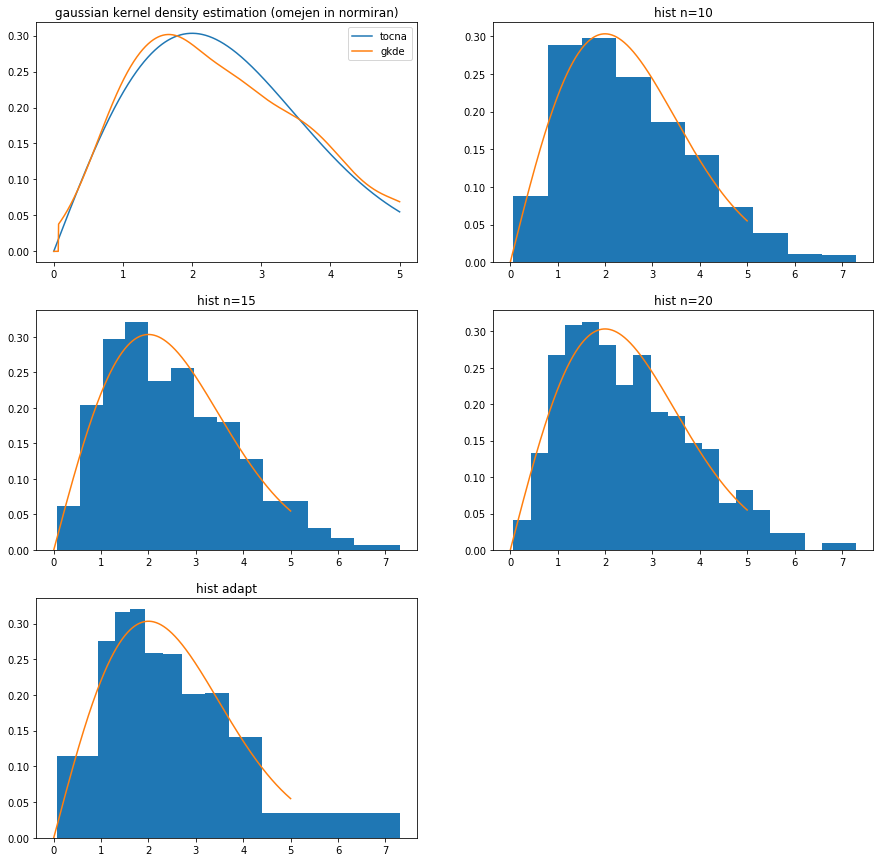

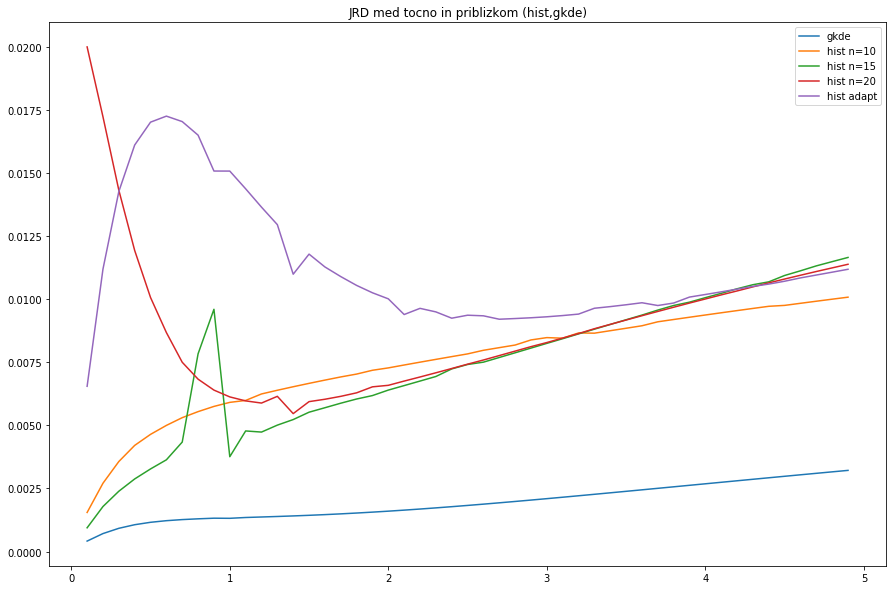

In [114]:
JRD_rayleigh_prikaz(2)

# RICE PORAZDELITEV

Poglejmo Rayleigh porazdelitev za parametre 0, 1, 2.

In [115]:
def JRD_rice_prikaz(b, n=600):
    print("RICE: b={}\n\n".format(str(b)))
    
    tocna = lambda x: stats.rice.pdf(x,b)

    data = stats.rice.rvs(b,size=n)
    ## omejimo območje, da ne dobimo ogromnih repov - drugače je nemogoče s histogrami
    # par = par[par < 10]

    gkde = pdf_na_int(stats.gaussian_kde(data),min(data),max(data))
    hist1 = hist_to_fun(np.histogram(data,bins=10,density=1))
    hist2 = hist_to_fun(np.histogram(data,bins=15,density=1))
    hist3 = hist_to_fun(np.histogram(data,bins=20,density=1))
    hist_adapt = hist_to_fun(np.histogram(data,bins=eqBins(data,10),density=1))
    
    ## TEST, CE JE VSE OK
    x = np.linspace(0,5,1000)
    plt.figure(figsize=(15,15))
    
    plt.subplot(3,2,1)
    plt.title("gaussian kernel density estimation (omejen in normiran)")
    plt.plot(x,tocna(x),label="tocna")
    plt.plot(x,gkde(x),label="gkde")
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.title("hist n=10")
    plt.hist(data,bins=10,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,3)
    plt.title("hist n=15")
    plt.hist(data,bins=15,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,4)
    plt.title("hist n=20")
    plt.hist(data,bins=20,density=1)
    plt.plot(x,tocna(x),label="tocna")

    plt.subplot(3,2,5)
    plt.title("hist adapt")
    plt.hist(data,bins=eqBins(data,10),density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    # izracun JRD
    rang_alpha = np.arange(0.1,5,0.1)

    gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("gkde_renyi - koncan")
    hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist1_renyi - koncan")
    hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist2_renyi - koncan")
    hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist3_renyi - koncan")
    hist_adapt_renyi = [JRD_pdfs([tocna,hist_adapt],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist_adapt_renyi - koncan")

    plt.figure(figsize=(15,10))
    plt.title("JRD med tocno in priblizkom (hist,gkde)")
    plt.plot(rang_alpha, gkde_renyi, label="gkde")
    plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
    plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
    plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
    plt.plot(rang_alpha, hist_adapt_renyi, label="hist adapt")
    plt.legend()
    
    print("\n\n\ntocna, gkde, histogrami")
    
    plt.show()

## RICE: b=0

RICE: b=0


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


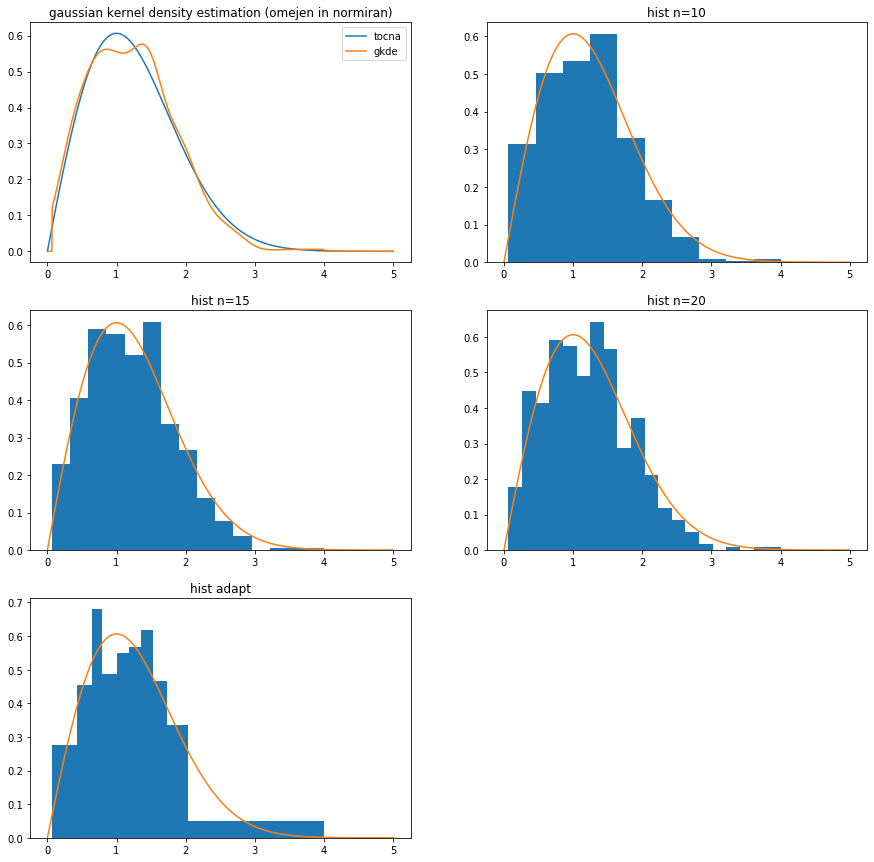

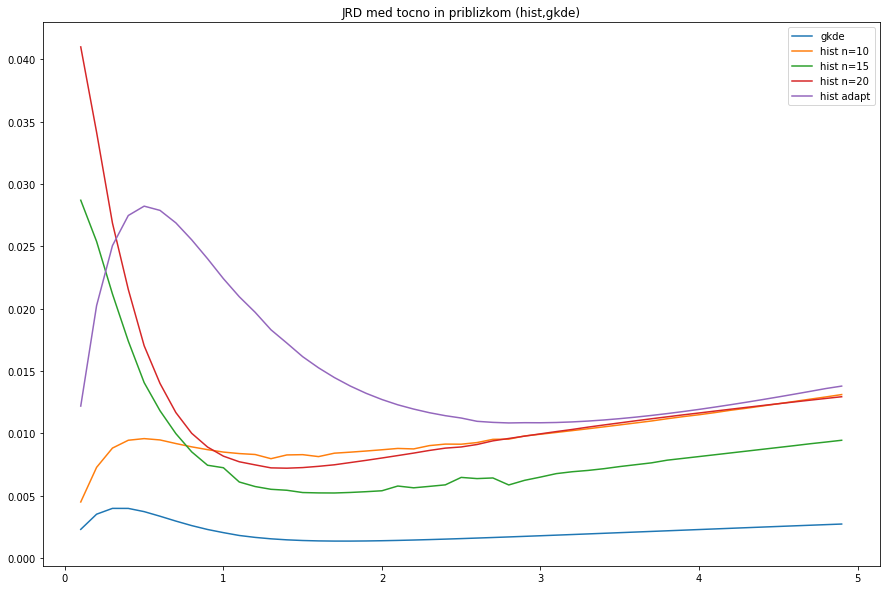

In [116]:
JRD_rice_prikaz(0)

## RICE: b=1

RICE: b=1


gkde_renyi - koncan
hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


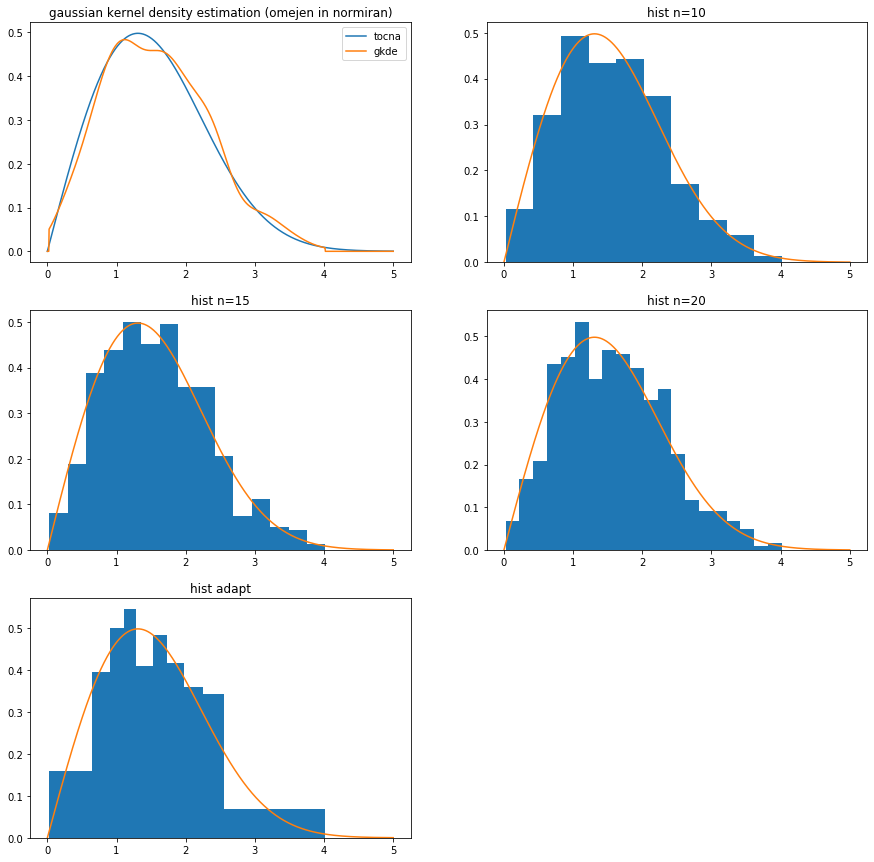

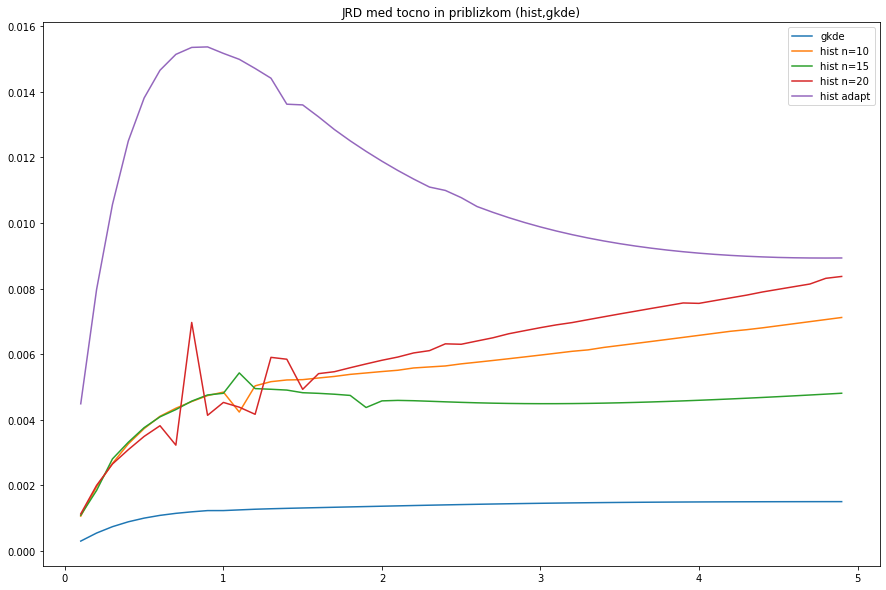

In [117]:
JRD_rice_prikaz(1)

## RICE: b=2

RICE: b=2


gkde_renyi - koncan


/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)
/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will

hist1_renyi - koncan
hist2_renyi - koncan
hist3_renyi - koncan
hist_adapt_renyi - koncan



tocna, gkde, histogrami


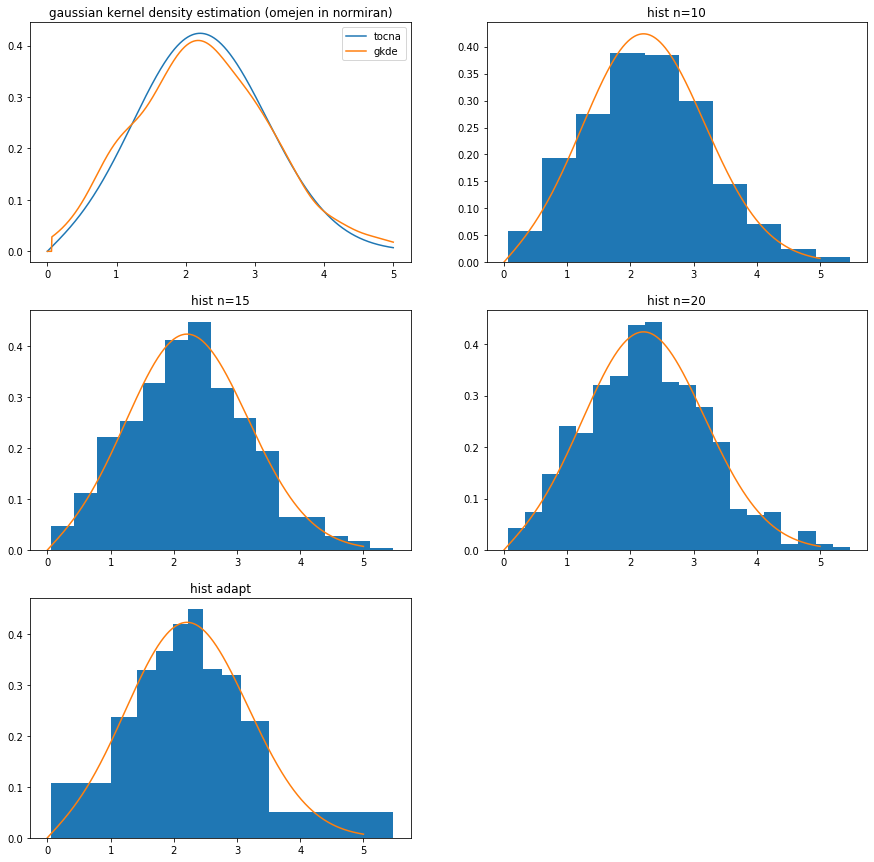

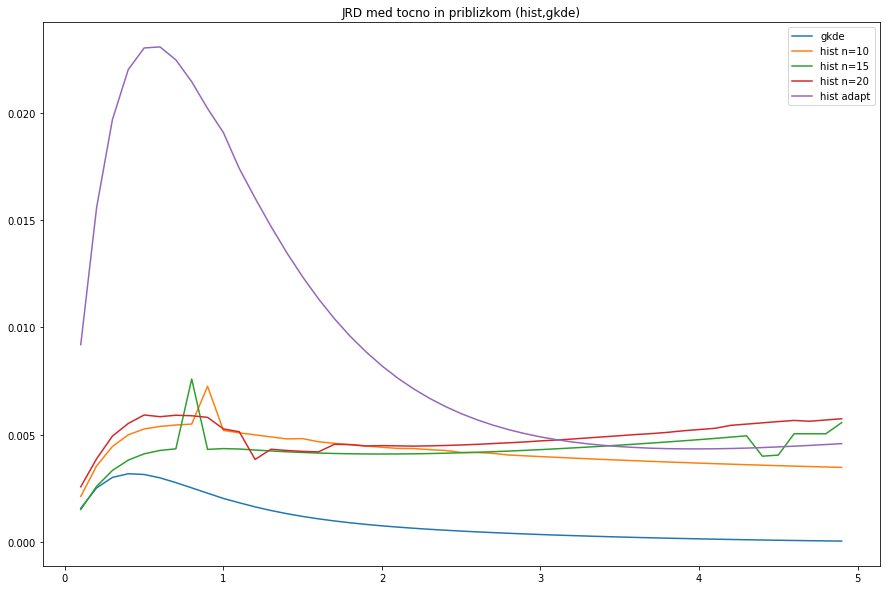

In [118]:
JRD_rice_prikaz(2)

# SKLEP

- porazdelitve s "trebuhi" najbolje estimira "gaussian kernel density estimation",
- porazdelitve na intervalih, ki nimajo "špic", najbolje estimirajo histogrami z ekvidistančnimi stolpci,
- porazdelitve na intervalih in polneskončnih intervalih, ki imajo "špice" v krajiščih, nimajo generalne metode za estimacijo.

**PREDLOG**: estimacija 2.,3. s kernel density estimation, ampak uporabimo druga jedra (triweight, epanechnikov, uniform, ...). => potrebno testirati

# ADAPTIVNI BANDWIDTH PRI KDE

Poskusimo popraviti metodo za metodo s "špicami".

In [2]:
alpha = 0.5
beta = 2

tocna = lambda x: stats.beta.pdf(x,alpha,beta)

data = np.random.beta(alpha,beta,n)
# omejimo območje, da ne dobimo ogromnih repov - drugače je nemogoče s histogrami
# par = par[par < 10]

gkde = pdf_na_int(stats.gaussian_kde(data),min(data),max(data))
hist1 = hist_to_fun(np.histogram(data,bins=10,density=1))

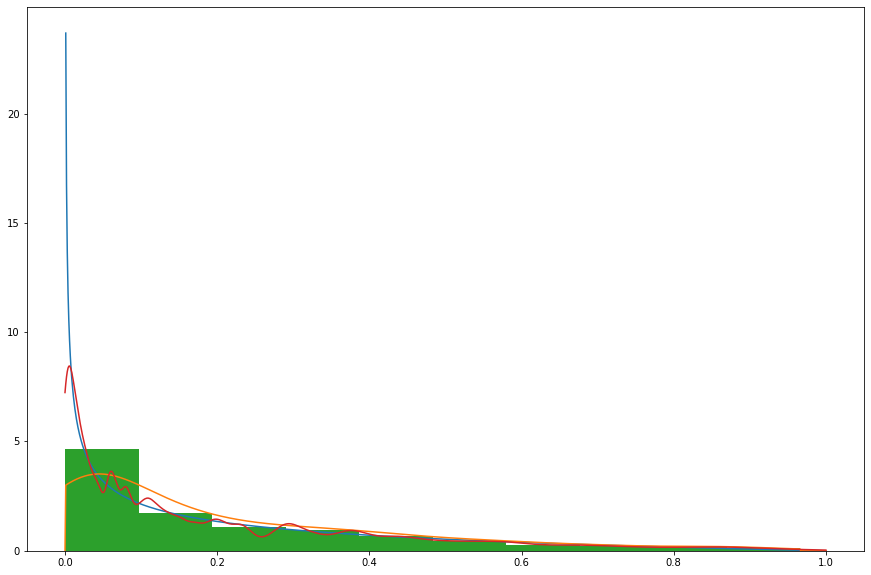

In [3]:
x = np.linspace(0,1,1000)

plt.figure(figsize=(15,10))
plt.plot(x,tocna(x))
plt.plot(x,gkde(x))
plt.hist(data, bins=10,density=1)

pdf = adapt_kde(data)
plt.plot(x,pdf(x))

plt.show()

In [4]:
def JRD_beta_prikaz(alpha,beta, n=600):
    print("BETA: a={}, b={}\n\n".format(str(alpha),str(beta)))
    
    tocna = lambda x: stats.beta.pdf(x,alpha,beta)

    data = np.random.beta(alpha,beta,n)
    ## omejimo območje, da ne dobimo ogromnih repov - drugače je nemogoče s histogrami
    # par = par[par < 10]

    gkde = pdf_na_int(stats.gaussian_kde(data),min(data),max(data))
    hist1 = hist_to_fun(np.histogram(data,bins=10,density=1))
    hist2 = hist_to_fun(np.histogram(data,bins=15,density=1))
    hist3 = hist_to_fun(np.histogram(data,bins=20,density=1))
    awkde = adapt_kde(data)
    
    ## TEST, CE JE VSE OK
    x = np.linspace(0,1,1000)
    plt.figure(figsize=(15,15))
    
    plt.subplot(3,2,1)
    plt.title("gaussian kernel density estimation (omejen in normiran)")
    plt.plot(x,tocna(x),label="tocna")
    plt.plot(x,gkde(x),label="gkde")
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.title("hist n=10")
    plt.hist(data,bins=10,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,3)
    plt.title("hist n=15")
    plt.hist(data,bins=15,density=1)
    plt.plot(x,tocna(x),label="tocna")
    
    plt.subplot(3,2,4)
    plt.title("hist n=20")
    plt.hist(data,bins=20,density=1)
    plt.plot(x,tocna(x),label="tocna")

    plt.subplot(3,2,5)
    plt.title("kde adapt")
    plt.plot(x,awkde(x),label="awkde")
    plt.plot(x,tocna(x),label="tocna")
    
    plt.show()
    
    # izracun JRD
    rang_alpha = np.arange(0.1,5,0.1)

    gkde_renyi = [JRD_pdfs([tocna,gkde],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("gkde_renyi - koncan")
    hist1_renyi = [JRD_pdfs([tocna,hist1],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist1_renyi - koncan")
    hist2_renyi = [JRD_pdfs([tocna,hist2],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist2_renyi - koncan")
    hist3_renyi = [JRD_pdfs([tocna,hist3],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
    print("hist3_renyi - koncan")
    awkde_renyi = []
#     awkde_renyi = [JRD_pdfs([tocna,awkde],i,minimum=min(data),maximum=max(data)) for i in rang_alpha]
#     print("awkde_renyi - koncan")
    for i in rang_alpha:
        awkde_renyi.append(JRD_pdfs([tocna,awkde],i,minimum=min(data),maximum=max(data)))
        print(i)

    plt.figure(figsize=(15,10))
    plt.title("JRD med tocno in priblizkom (hist,gkde)")
    plt.plot(rang_alpha, gkde_renyi, label="gkde")
    plt.plot(rang_alpha, hist1_renyi, label="hist n=10")
    plt.plot(rang_alpha, hist2_renyi, label="hist n=15")
    plt.plot(rang_alpha, hist3_renyi, label="hist n=20")
    plt.plot(rang_alpha, awkde_renyi, label="awkde")
    plt.legend()
    
    print("\n\n\ntocna, gkde, histogrami, awkde")
    
    plt.show()

BETA: a=0.5, b=2




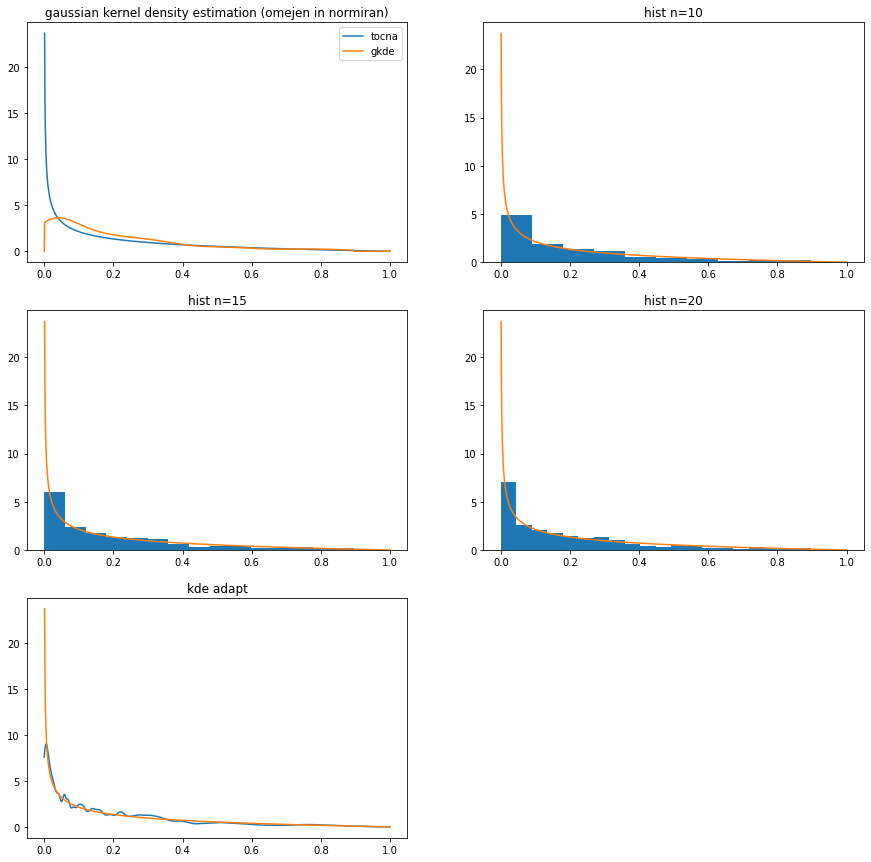

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/renyi.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return (1/(1-alpha))*log(integrate.quad(pdf_na_alpha, minimum, maximum)[0], e)


In [ ]:
JRD_beta_prikaz(0.5,2)